<a href="https://colab.research.google.com/github/AnnKulyk/Python/blob/main/%D0%B4_%D0%B7_%22HW3_%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%BD%D1%96_%D0%B2%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%97_%D0%B7_Seaborn_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Статистичні візуалізації з Seaborn

## Опис завдання
У цьому домашньому завданні ви будете використовувати бібліотеку Seaborn для створення красивих статистичних візуалізацій. Seaborn має кращий стандартний стиль та спеціалізується на статистичних графіках.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - як відчувається температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [4]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,1,52,5,Saturday,2011,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,1,52,5,Saturday,2011,1,4


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Завантаження даних
df = pd.read_csv('/content/drive/MyDrive/data/yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Встановлюємо стиль seaborn
sns.set_theme(style="whitegrid")

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



---

## Завдання 1: Лінійний графік з довірчими інтервалами

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно з довірчими інтервалами (confidence intervals) рівними 1 стандартному відхиленню.

**УВАГА!** В лекції ми будували подібний графік, але там були дані по номеру місяця, а тут треба зобразити дані в розрізі місяць_рік.

В якості підказки вам наведений код для створення колонки, яка містить `місяць_рік`. Як її використати - вже питання до вас :)

Очікуваний результат:
![](https://drive.google.com/uc?id=1uVKqfY1VlhVMaM3wu99uVGT1f7S0Vf8S)

**Питання для інтерпретації:**
- В які місяці найбільша невизначеність в даних?

In [7]:
df['month_year'] = df.index.to_period('M')
df['month_year']  = df.month_year.astype(str)

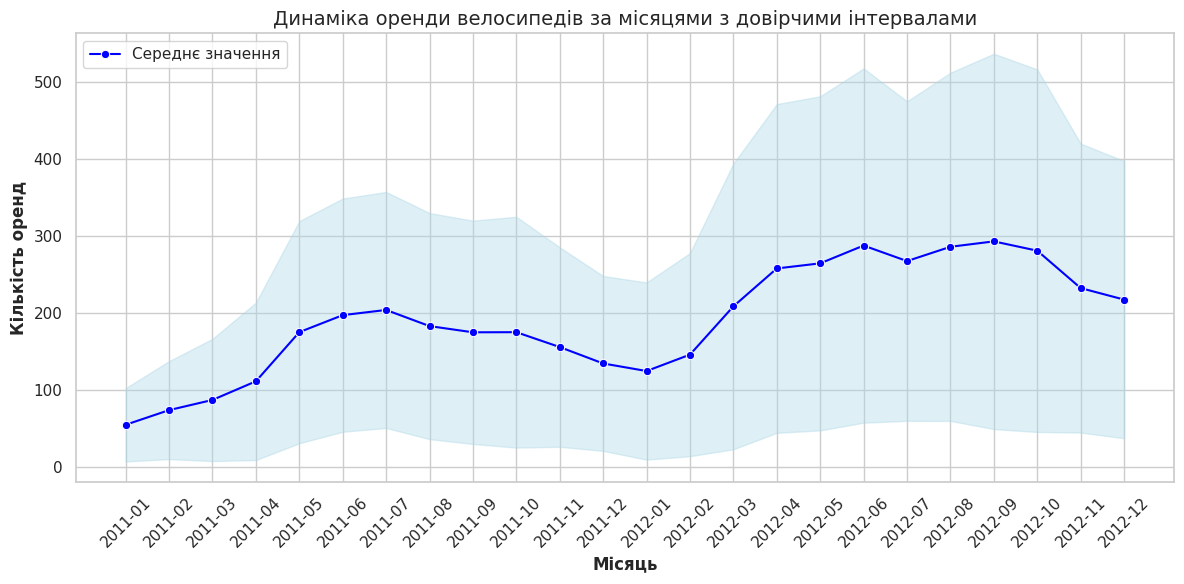

In [8]:

monthly_stats = df.groupby('month_year')['count'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=monthly_stats,
    x='month_year',
    y='mean',
    marker='o',
    color='blue',
    label='Середнє значення'
)

plt.fill_between(
    monthly_stats['month_year'],
    monthly_stats['mean'] - monthly_stats['std'],
    monthly_stats['mean'] + monthly_stats['std'],
    color='lightblue',
    alpha=0.4,
    label='±1 стандартне відхилення'
)

plt.title('Динаміка оренди велосипедів за місяцями з довірчими інтервалами', fontsize=14)
plt.xlabel('Місяць', fontsize=12, fontweight='bold')
plt.ylabel('Кількість оренд', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

найбільша невизначеність позинається з травня 2012 і орієнтовно до вересня 2012

## Завдання 2: Порівняння стилів - Pandas vs Seaborn гістограма

**Завдання:**
Побудуйте гістограму розподілу температури двома способами - з Pandas та Seaborn - та порівняйте візуальний вигляд. Задайте однакову кількість бінів в цих візуалізаціях, відмінну від стандартної. В візуалізації Seaborn додайте параметр при побудові `kde=True`.

**Функція Seaborn: `sns.histplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

**Дайте відповідь на питання:**
1. Яка візуальна різниця між Pandas та Seaborn гістограмами?
2. Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?

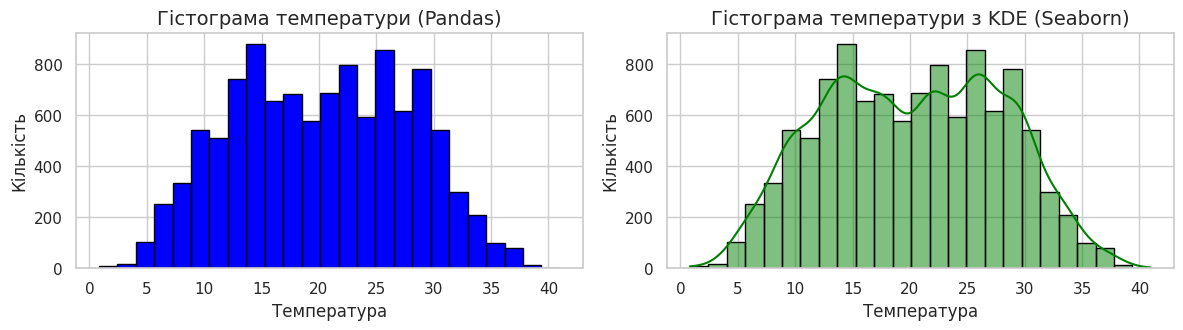

In [9]:
plt.figure(figsize=(12, 6))

#   Pandas
plt.subplot(2,2, 1)
df['temp'].plot.hist(bins=25, color='blue', edgecolor='black')
plt.title('Гістограма температури (Pandas)', fontsize=14)
plt.xlabel('Температура')
plt.ylabel('Кількість')
plt.grid(True)

#  Seaborn
plt.subplot(2,2, 2)
sns.histplot(data=df, x='temp', bins=25, kde=True, color='green', edgecolor='black')
plt.title('Гістограма температури з KDE (Seaborn)', fontsize=14)
plt.xlabel('Температура')
plt.ylabel('Кількість')
plt.grid(True)

plt.tight_layout()
plt.show()


kde - це гладка крива розподілу, яка дає змогу оцінити щільність ймовірності. Ця лінія наглядно показує на графіку де найвищі значення. Саме наявність цієї лінії і є основною візуальною відмінністю між графіками побудованими через задані бібліотеки. Також в Seaborn більш розширений функціонал, що дає змогу візуально гарніші графіки будувати

## Завдання 3: Box Plot порівняння - Pandas vs Seaborn

**Завдання:**
Побудуйте box plot для кількості погодинних оренд велосипедів за погодними умовами з Pandas та Seaborn.

**Функція Seaborn: `sns.boxplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

Просунуте доповнення:
- підпишіть погодні умови їх інтерпретацією з опису даних в обох графіках

**Дайте відповідь на питання:**
- Яка візуальна різниця між Pandas та Seaborn бокс-плотами?

In [12]:
weather_labels = {
    1: 'Ясно',
    2: 'Туман',
    3: 'Легкий дощ',
    4: 'Сильний дощ'
}

df['weather_desc'] = df['weather'].map(weather_labels)

/tmp/ipython-input-18-897864762.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='weather_desc', y='count', palette='Set2')


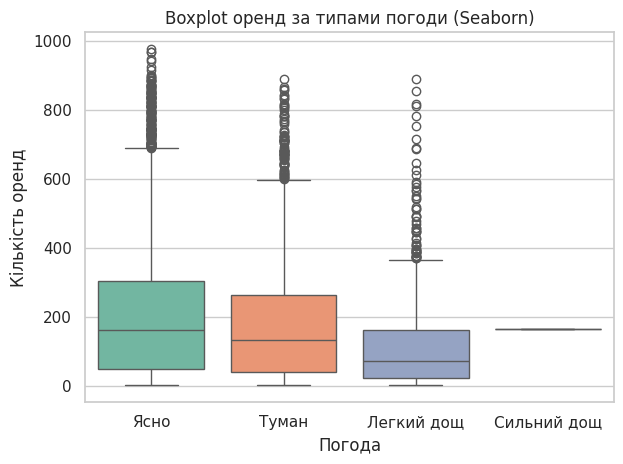

In [18]:
#  Seaborn boxplot
#plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='weather_desc', y='count', palette='Set2')
plt.title('Boxplot оренд за типами погоди (Seaborn)')
plt.xlabel('Погода')
plt.ylabel('Кількість оренд')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Кількість оренд')

<Figure size 1400x600 with 0 Axes>

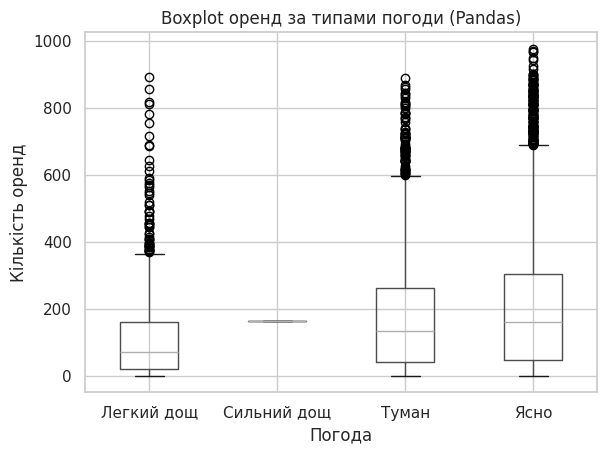

In [17]:
plt.figure(figsize=(14, 6))

# Pandas boxplot
#plt.subplot(1, 2, 1)
df.boxplot(column='count', by='weather_desc')
plt.title('Boxplot оренд за типами погоди (Pandas)')
plt.suptitle('')
plt.xlabel('Погода')
plt.ylabel('Кількість оренд')

Seaborn дає можливість створити більш органічний графік з кольоровими ефектами

<!-- - -->
## Завдання 4: Heatmap кореляційної матриці

**Завдання:**
Створіть із Seaborn кореляційну матрицю з забарвленням heatmap (колір відповідає величині значення в клітинці) числових змінних в наших даних з анотаціями значень.

**Дайте відповіді на питання по графіку:**
1. Які змінні найсильніше корелюють з загальною кількістю оренди (count)?
2. Яка кореляція між temp та atemp? Чому?
3. Які змінні мають негативну кореляцію?


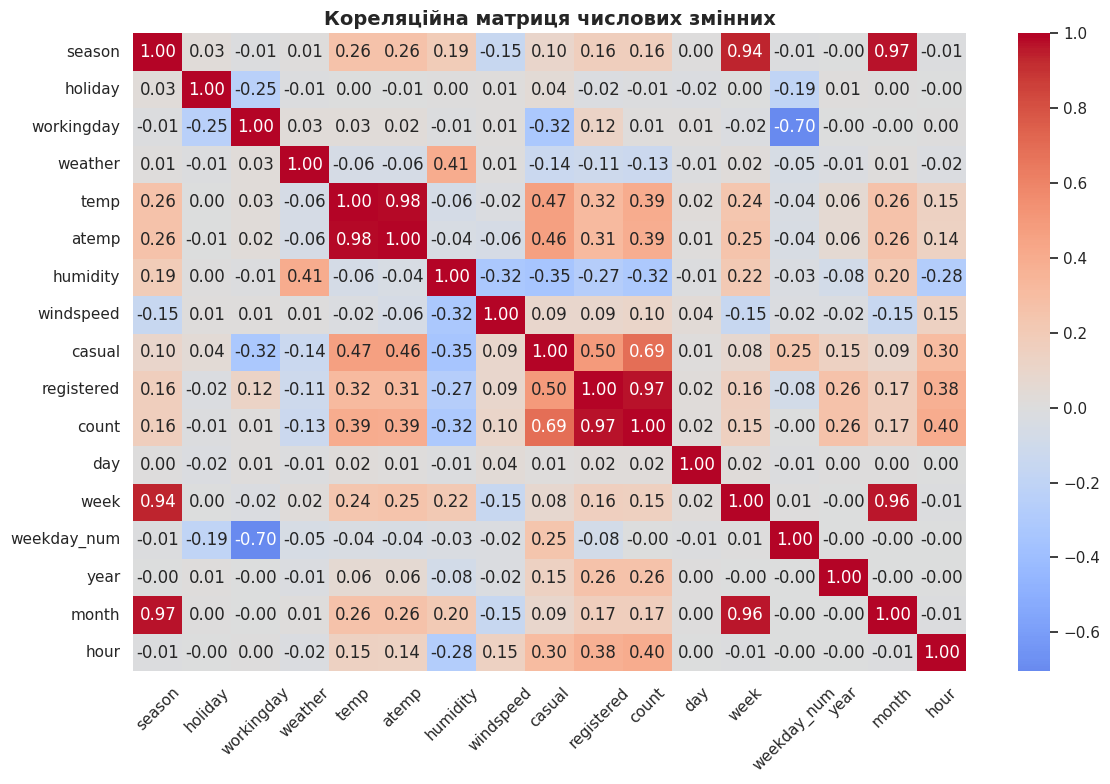

In [22]:
numeric_df = df.select_dtypes(include='number')

corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)

plt.title('Кореляційна матриця числових змінних', fontsize=14, weight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

- найвища кореляція позитивна в кількості оренд з кількістю регістрацій
- кореляція між temp та atemp високо позитивна, що свідчить про пряму залежність між показниками.
- найбільш помітна негативна кореляція між вологогістю і кількістю оренд. Чим вища вологість тим менша кількість оренд

## Завдання 5: Violin Plot для глибокого аналізу розподілів

**Завдання:**
Створіть violin plot для аналізу розподілу оренди за сезонами.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показує "товщина" violin plot?
2. В якому сезоні найбільша варіабельність оренди?
3. Яка перевага violin plot над звичайним box plot?


/tmp/ipython-input-25-459848607.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_copy, x='season', y='count', palette='Set2')


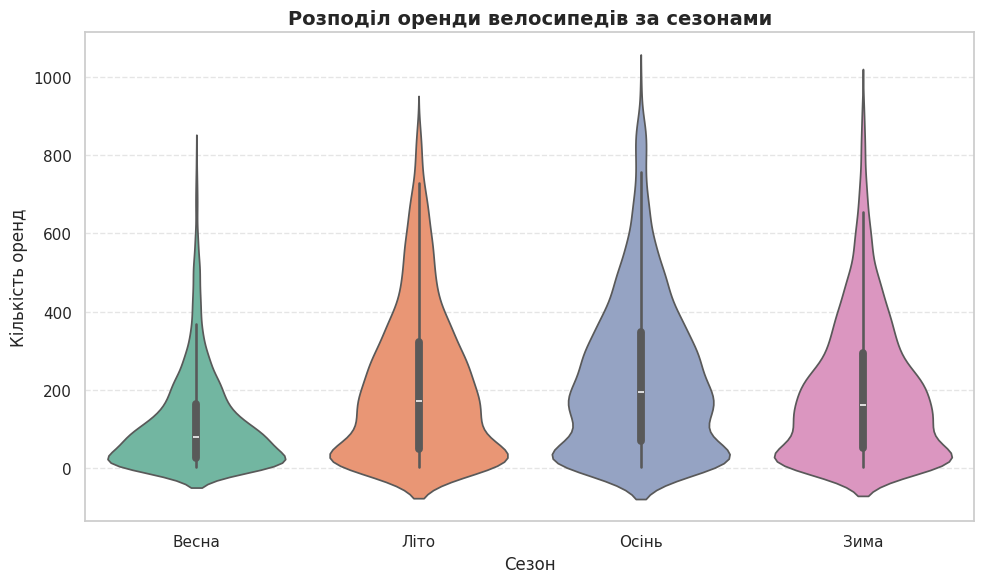

In [25]:
df_copy = df.copy()
df_copy['season'] = df_copy['season'].map({
    1: 'Весна',
    2: 'Літо',
    3: 'Осінь',
    4: 'Зима'
})

plt.figure(figsize=(10, 6))
sns.violinplot(data=df_copy, x='season', y='count', palette='Set2')

plt.title('Розподіл оренди велосипедів за сезонами', fontsize=14, weight='bold')
plt.xlabel('Сезон', fontsize=12)
plt.ylabel('Кількість оренд', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

- товщина вказує на щільність розподілу
- літо та осінь мають найбільшу варіабельність
- цей графік ще дає змогу оцінити щільність розподілу і форму

## Завдання 6: Pairplot для мультиваріативного аналізу

**Завдання:**
Створіть pairplot для аналізу взаємозв'язків між ключовими змінними `'temp', 'humidity', 'windspeed', 'count'` . В якості візуальної розбивки за категоріями (параметр `hue`) додайте сезон.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Між якими змінними спостерігається найсильніший лінійний зв'язок?
2. Яка характеристика найбільше змінюється від сезону?

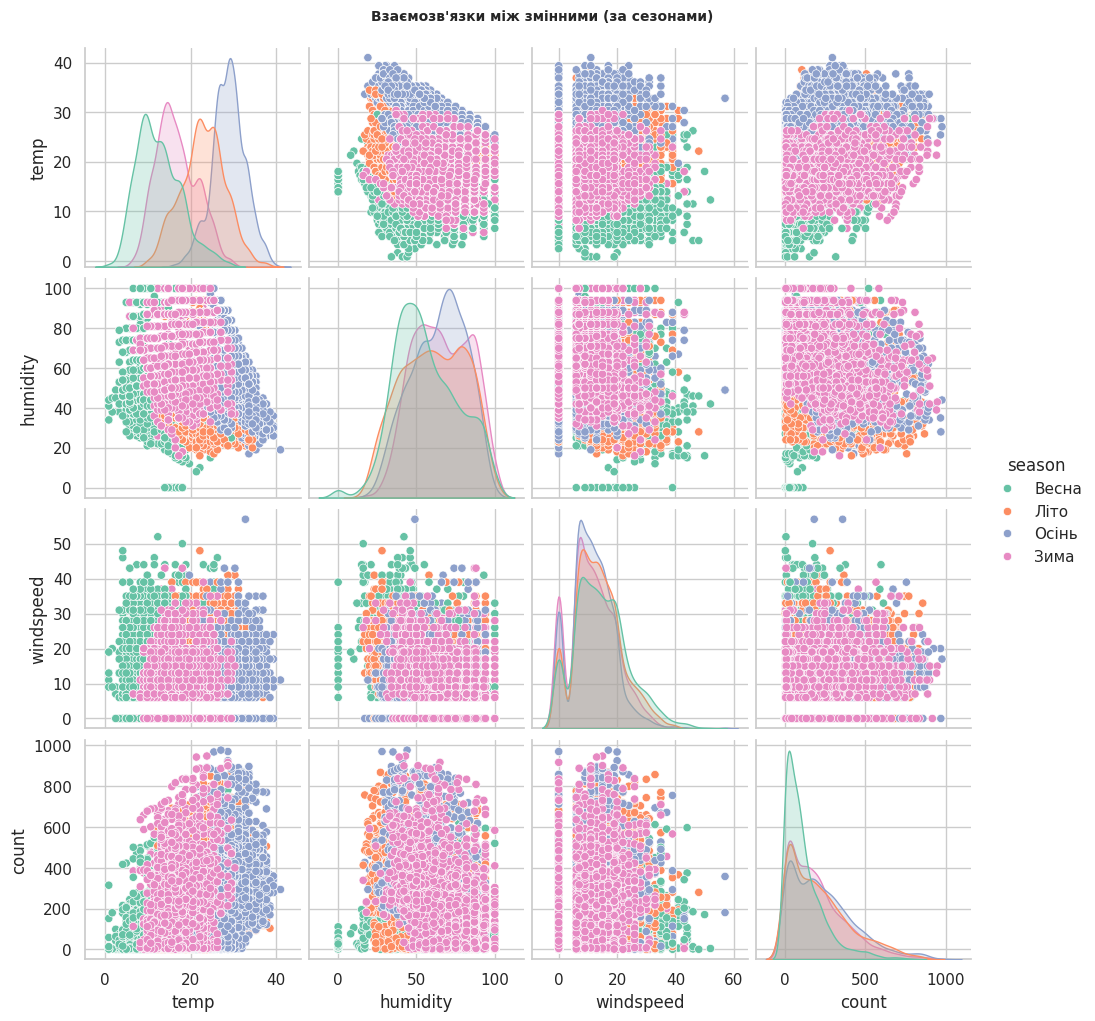

In [27]:
sns.pairplot(df_copy, vars=['temp', 'humidity', 'windspeed', 'count'], hue='season', palette='Set2')
plt.suptitle("Взаємозв'язки між змінними (за сезонами)", y=1.02, fontsize=10, weight='bold')
plt.show()

- найбільший лінійний звязок у пари температура/кількість оренд
- від сезону змінюється температура

## Завдання 7: Joint Plot для детального аналізу двох змінних

**Завдання:**
Проаналізуйте залежність між температурою та орендою за допомогою joint plot. В якості візуальної розбивки за категоріями (параметр `hue`) додайте `workingday`.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показують графіки по краях?
2. Чи є різниця у поведінці користувачів у робочий і неробочий день?

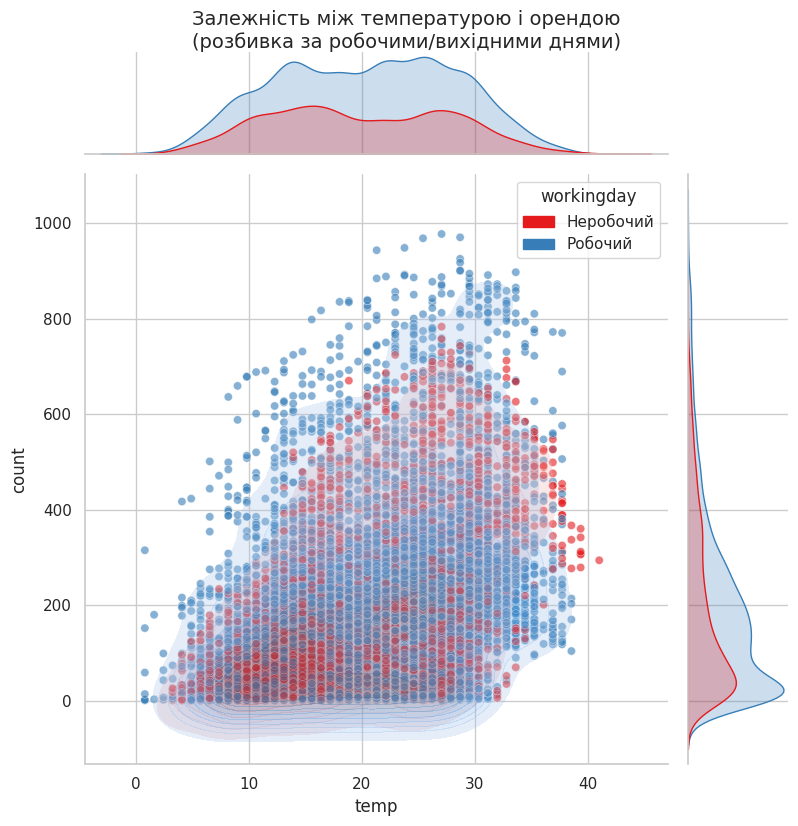

In [28]:
df_copy = df.copy()
df_copy['workingday'] = df_copy['workingday'].map({0: 'Неробочий', 1: 'Робочий'})

sns.jointplot(
    data=df_copy,
    x='temp',
    y='count',
    hue='workingday',
    kind='scatter',
    alpha=0.6,
    palette='Set1',
    height=8
).plot_joint(sns.kdeplot, fill=True, alpha=0.3)

plt.suptitle("Залежність між температурою і орендою\n(розбивка за робочими/вихідними днями)", fontsize=14, y=1.03)
plt.show()

-